In [2]:
from PIL import Image
import os
import os.path as osp
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# from torch_points3d.datasets.segmentation.scannet import CLASS_COLORS

In [3]:
file = "../../ViT-Adapter/segmentation/job_logs/eval_testset.out"

with open(file) as f:
    lines = f.readlines()

    print(len(lines))
    
    pattern = 'scene_id, img_save_name:'
    matching_lines = [line for line in lines if pattern in line]
    image_ids = [m.split()[-2:] for m in matching_lines]
    
    print(image_ids)
    


366
[['scene0011_00', '1004.png'], ['scene0011_00', '1022.png'], ['scene0011_00', '0.png'], ['scene0011_00', '1031.png']]


In [4]:
CLASS_COLORS = [(174.0, 199.0, 232.0),
 (152.0, 223.0, 138.0),
 (31.0, 119.0, 180.0),
 (255.0, 187.0, 120.0),
 (188.0, 189.0, 34.0),
 (140.0, 86.0, 75.0),
 (255.0, 152.0, 150.0),
 (214.0, 39.0, 40.0),
 (197.0, 176.0, 213.0),
 (148.0, 103.0, 189.0),
 (196.0, 156.0, 148.0),
 (23.0, 190.0, 207.0),
 (247.0, 182.0, 210.0),
 (219.0, 219.0, 141.0),
 (255.0, 127.0, 14.0),
 (158.0, 218.0, 229.0),
 (44.0, 160.0, 44.0),
 (112.0, 128.0, 144.0),
 (227.0, 119.0, 194.0),
 (82.0, 84.0, 163.0),
 (0.0, 0.0, 0.0)]

[ 0  1  2  5  8 11 14 19]


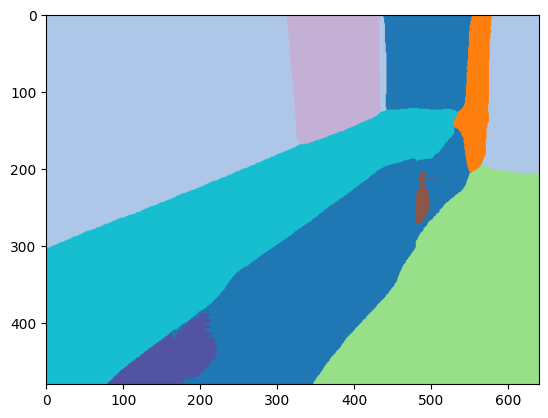

[ 0  1  2  4  5  6  8 10 11 14]


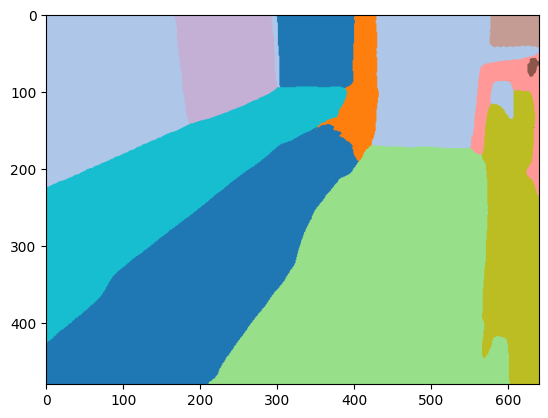

[ 0  1  2  4  6  8 11 14 17]


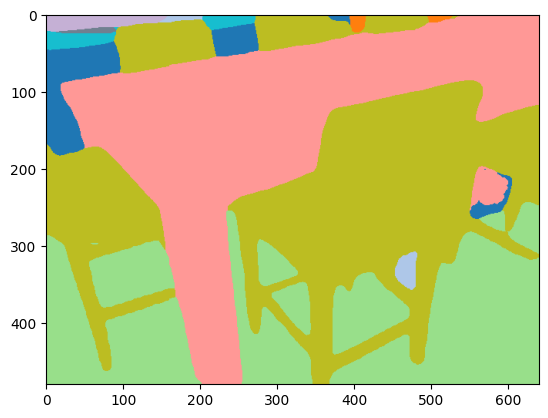

[ 0  1  2  4  6  8 10 11 14 19]


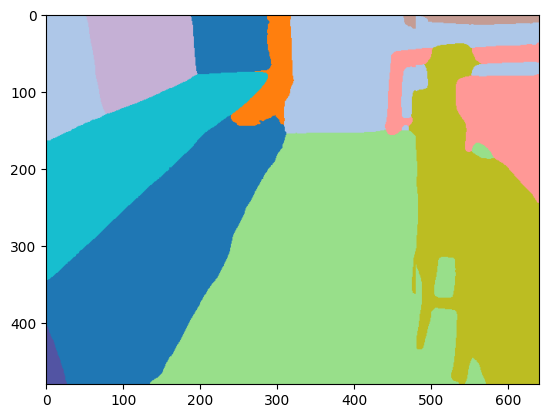

In [6]:


for scene_id, im_id in image_ids:
    seg_im_dir = "/project/fsun/data/scannet/scans"
    seg_im_p = osp.join(seg_im_dir, scene_id, 'ViT_masks', im_id)
    seg_im = Image.open(seg_im_p)
    
    col_im_p = osp.join(seg_im_dir, scene_id, 'color_resized', im_id)
    col_im = Image.open(col_im_p)
# np.unique()

    seg_im_np = np.array(seg_im) -1
    print(np.unique(seg_im_np))

    seg_im_rgb = np.array(CLASS_COLORS)[seg_im_np.astype(int)]

    seg_im_rgb = Image.fromarray(seg_im_rgb.astype(np.uint8))
    plt.imshow(seg_im_rgb)
    plt.show()
    